In [5]:
!pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25847 sha256=3763d015c0f6b5b72469e9e04fb295d4e0458479dbe0d55ec7770fbad2d7d06e
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [1]:
import cv2 as cv
import numpy as np
from IPython.display import Image,display 
import imutils

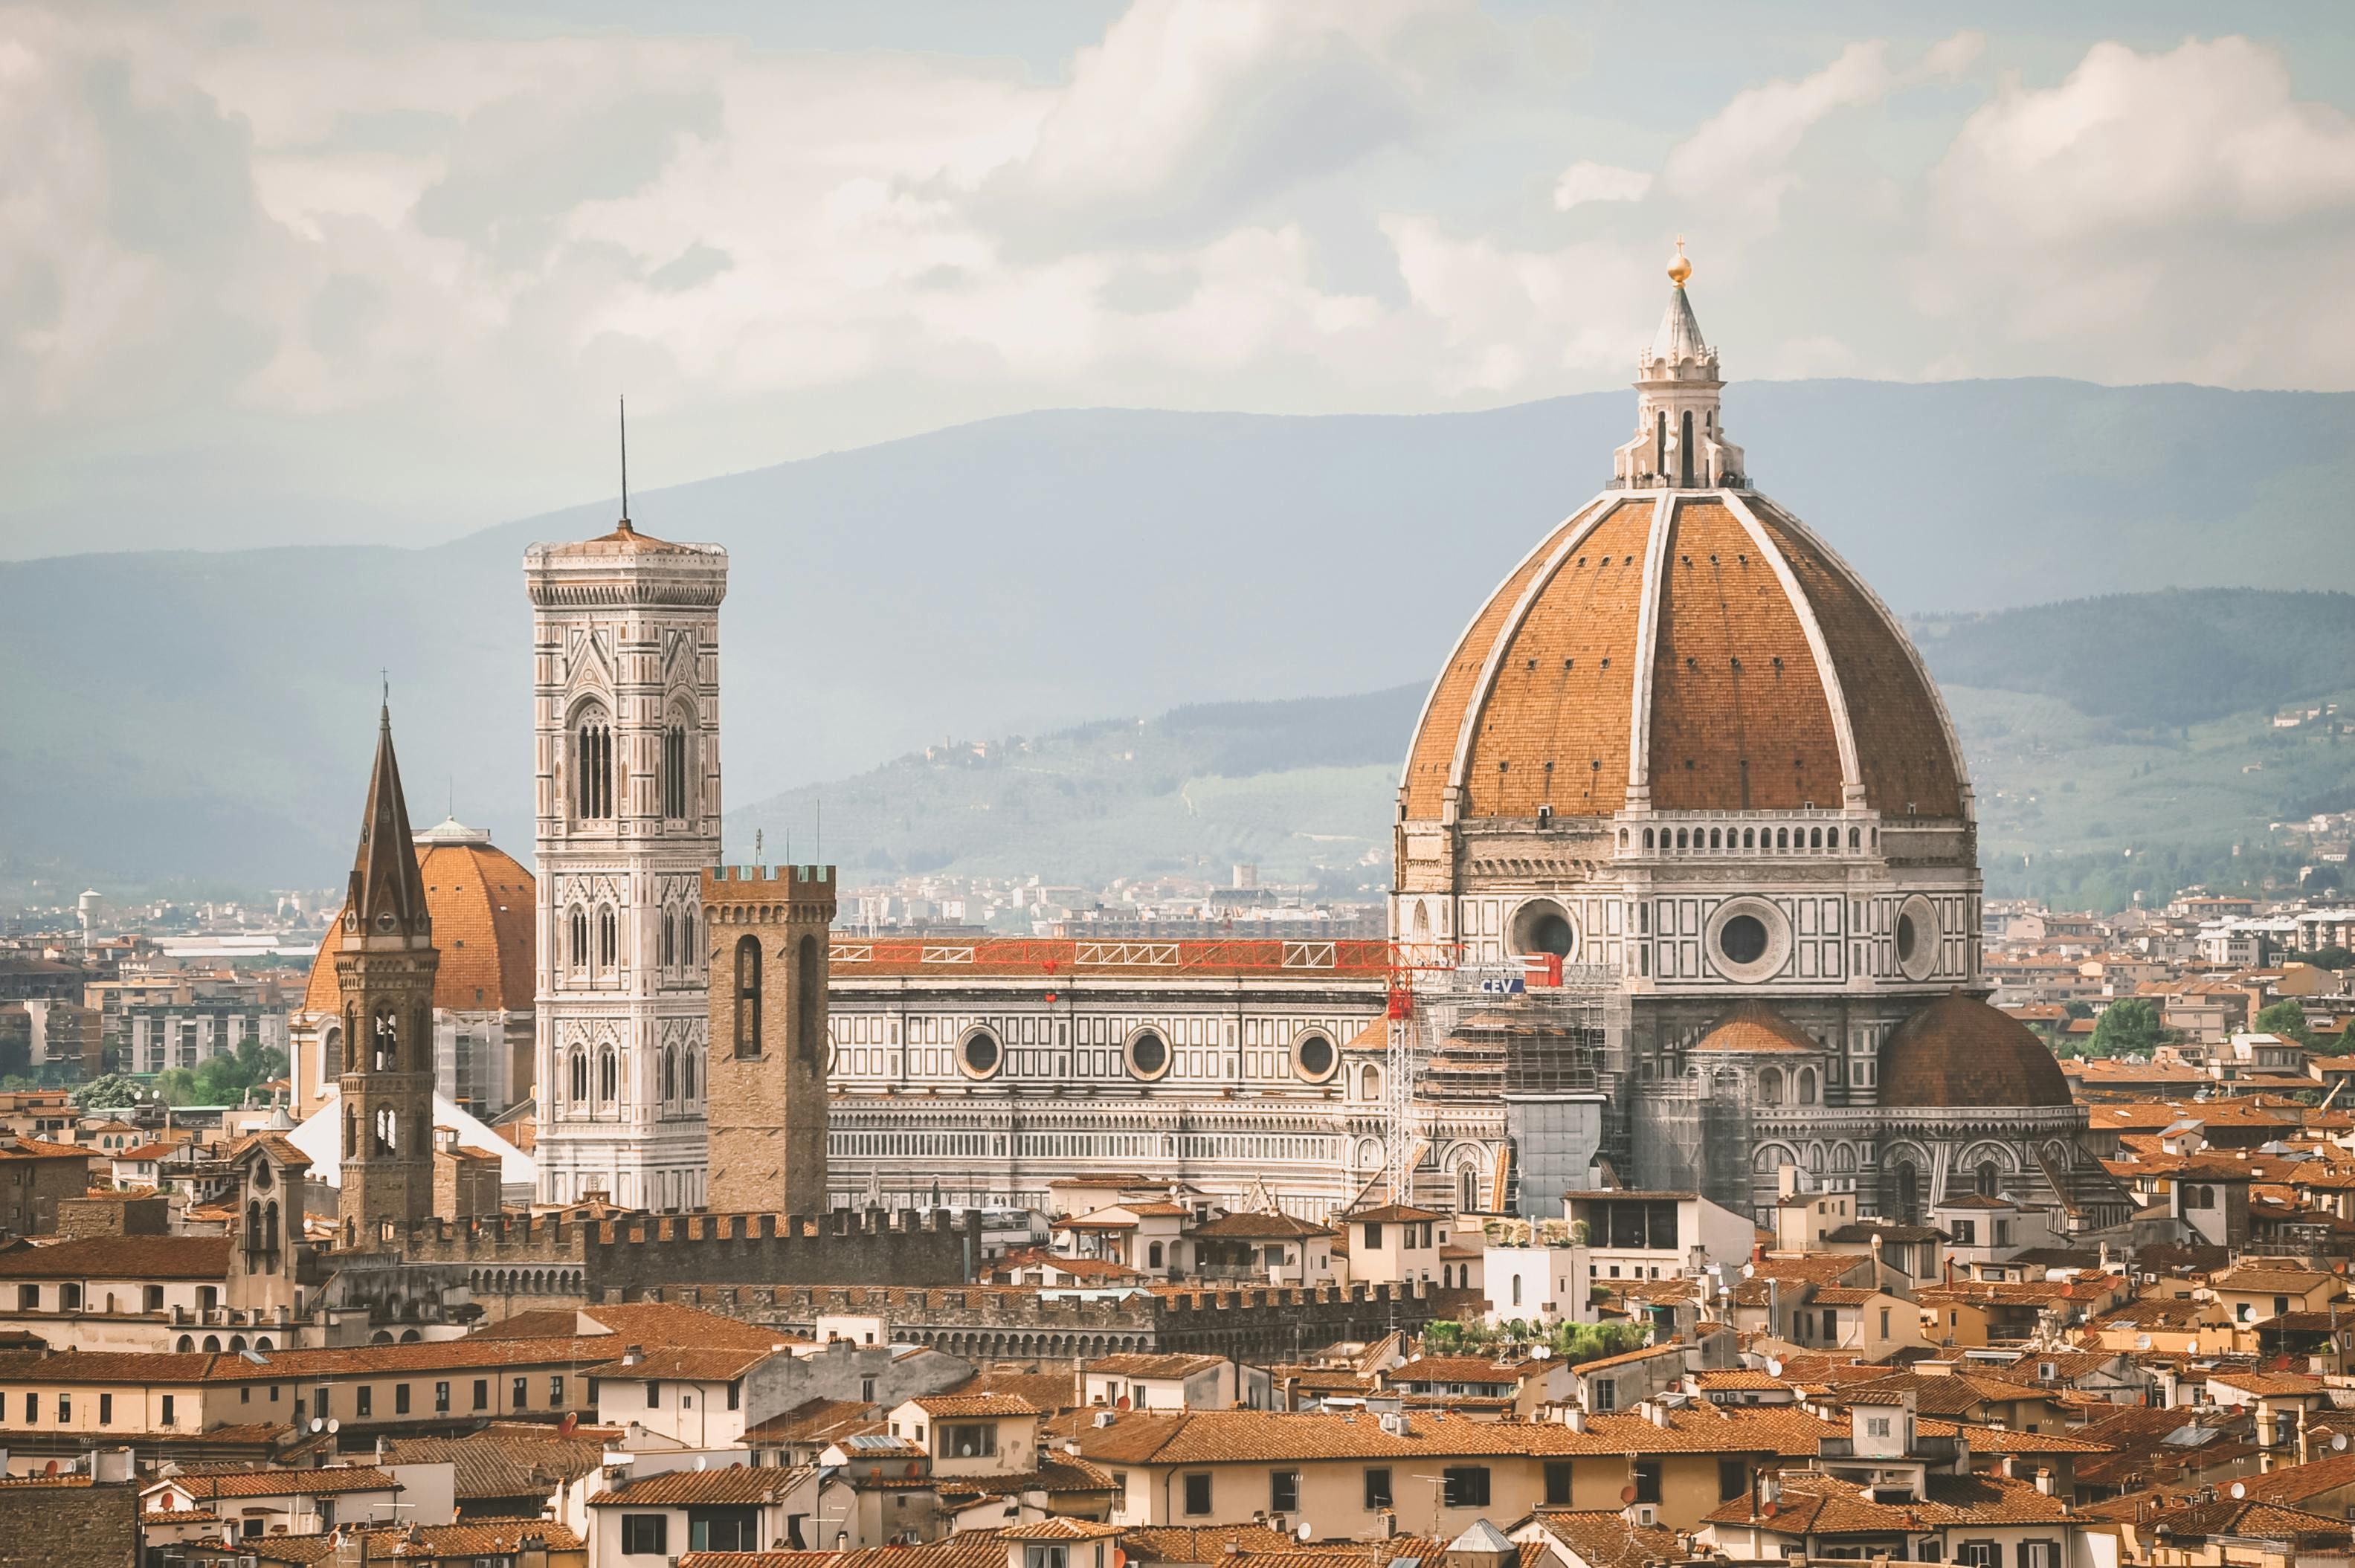

In [30]:
Image(r"C:\Users\Dell\YoloV8\Assigment\spot diff-image\Image1.jpg")

In [86]:
# Loading Images
img1=cv.imread(r"C:\Users\Dell\YoloV8\Assigment\spot diff-image\Image1.jpg")
img1=cv.resize(img1,(700,500))

img2=cv.imread(r"C:\Users\Dell\YoloV8\Assigment\spot diff-image\Image1-1.jpg")
img2=cv.resize(img2,(700,500))

cv.imshow("original",img1)
cv.imshow("edited",img2)

# convert to gray scale image
gray1=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2=cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

# finding difference 
diff=cv.absdiff(gray1,gray2)
cv.imshow("diff ",diff)

# Apply Threshold
thresh=cv.threshold(diff,0,255,cv.THRESH_BINARY|cv.THRESH_OTSU)[1]
cv.imshow("Threshold",thresh)

#dilation
kernel=np.ones((5,5),np.uint8)
dilate=cv.dilate(thresh,kernel,iterations=2)
cv.imshow("diated",dilate)

# calculating similarity score
match_score=cv.matchTemplate(img1,img2,cv.TM_CCOEFF_NORMED)

# Find contours
contours=cv.findContours(dilate.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(contours)

for contour in contours:
    if cv.contourArea(contour)>100:
        x,y,w,h=cv.boundingRect(contour)
        cv.rectangle(img1,(x,y),(x+w,y+h),(0,0,250),2)
        cv.rectangle(img2,(x,y),(x+w,y+h),(0,0,250),2)
        cv.putText(img2,"Similarity: "+str(match_score[0][0]),(10,50),cv.FONT_HERSHEY_SIMPLEX,0.7,(0,250,0),2)
        

        
#show final image with difference
x=np.zeros((img1.shape[0],10,3),np.uint8)
result=np.hstack((img1,x,img2))
# result=cv.resize(result,(img2.shape[1],img2.shape[0]))

cv.imshow("difference",result)

cv.waitKey(0)
cv.destroyAllWindows()

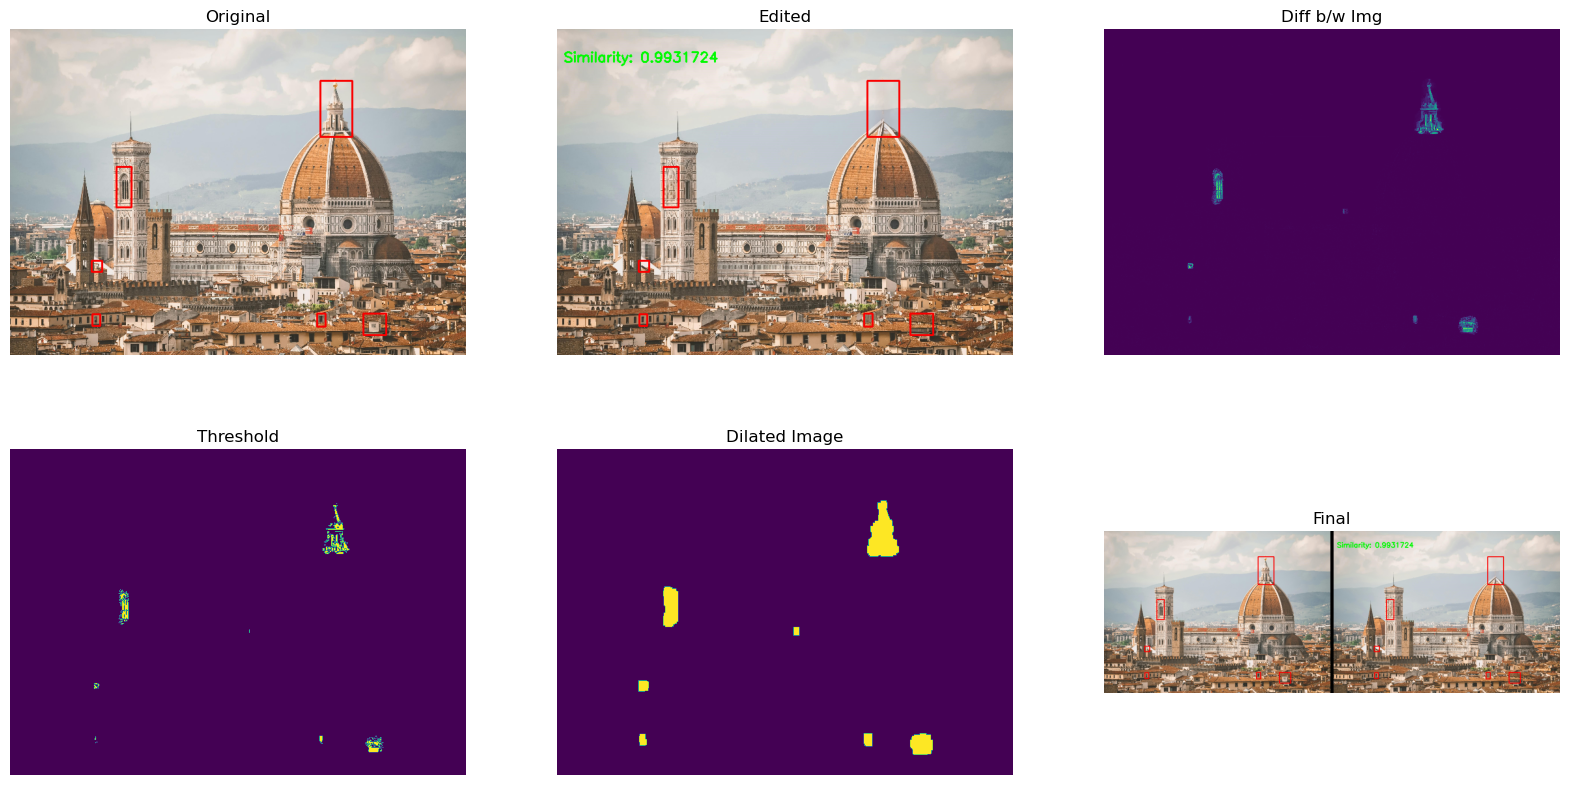

In [87]:
import matplotlib.pyplot as plt

img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)
result=cv.cvtColor(result,cv.COLOR_BGR2RGB)

# Define the images you want to plot
images = [img1, img2, diff, thresh, dilate, result]
titles = ["Original", "Edited", "Diff b/w Img", "Threshold", "Dilated Image", "Final"]

# Set up the figure and axes
fig, axes = plt.subplots(2,3, figsize=(20,10))

# Loop through the images and plot them
for ax, img, title in zip(axes.ravel(), images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.show()

In [7]:
img2.shape

(500, 700, 3)